In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [103]:
# Import dataset 
data=pd.read_csv(r"C:\Users\ASUS\Downloads\Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [104]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [105]:
# Do One Hot Encoding of Species Column 
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
oh.fit_transform(data[["Species"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 159 stored elements and shape (159, 7)>

In [106]:
c=oh.transform(data[['Species']]).toarray()

In [107]:
data_Species=pd.DataFrame(c,columns=data['Species'].unique())
data_Species

,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [109]:
# Concatinate two data
data[['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']]=data_Species

In [110]:
data=data.drop(columns='Species')

In [111]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width', 'Bream',
       'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype='object')

In [113]:
weight = data.pop('Weight')
data['Weight'] = weight


In [114]:
data

,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt,Weight
0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0
1,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0
2,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0
3,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0
4,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2
155,11.7,12.4,13.5,2.4300,1.2690,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.4
156,12.1,13.0,13.8,2.2770,1.2558,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2
157,13.2,14.3,15.2,2.8728,2.0672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.7


In [115]:
# Remove outliers 
# First we have to clean the dataset 
# Remove the outliers first 
df = data.copy()
for col in data.columns:
    # Skip the column if d_type =object 
    if data[col].dtype == 'object':
        continue
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    lo_limit = q1 - 1.5 * iqr
    df = df[(df[col] >= lo_limit) & (df[col] <= up_limit)]




<Axes: >

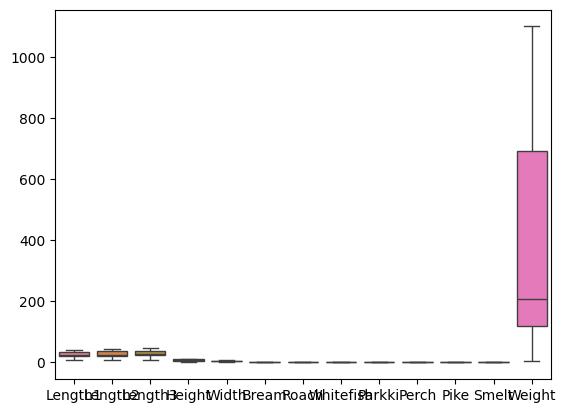

In [116]:
sns.boxplot(df)# So Their is no Null value present 

In [117]:
# Split the dataset into x and y output 
x=df.iloc[:,:-1]
y=df["Weight"]
df.head()

,Length1,Length2,Length3,Height,Width,Bream,Roach,Whitefish,Parkki,Perch,Pike,Smelt,Weight
72,7.5,8.4,8.8,2.1120,1.4080,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.9
73,12.5,13.7,14.7,3.5280,1.9992,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0
74,13.8,15.0,16.0,3.8240,2.4320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0
75,15.0,16.2,17.2,4.5924,2.6316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51.5
76,15.7,17.4,18.5,4.5880,2.9415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,70.0


In [118]:
# implement Polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x=pd.DataFrame(pf.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.0,7.5,8.4,8.8,2.1120,1.4080,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,12.5,13.7,14.7,3.5280,1.9992,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,13.8,15.0,16.0,3.8240,2.4320,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,15.0,16.2,17.2,4.5924,2.6316,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.7,17.4,18.5,4.5880,2.9415,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Split the dataset in Train And test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [120]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
lr.score(x_test,y_test)

0.9912720220766463

In [122]:
x_train 

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
34,1.0,25.9,28.0,29.4,7.8204,4.2042,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,25.2,27.3,28.7,8.3230,5.1373,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,17.8,19.6,20.8,5.1376,3.0368,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,20.0,22.0,23.5,5.8750,3.5250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,16.8,18.7,19.4,5.1992,3.1234,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.7,17.4,18.5,4.5880,2.9415,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,1.0,34.0,36.0,38.3,10.6091,6.7408,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,23.0,25.0,26.5,6.4395,3.6835,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,1.0,36.9,40.0,42.3,11.9286,7.1064,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,1.0,36.6,39.0,41.3,12.4313,7.3514,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
